

Primer parcial SIS420

    Universitario: Flores Yampara Felix Antonio
    Docente: Ing. Pacheco Lora Carlos Walter
    Ejercicio: D2
  



In [264]:
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize

%matplotlib inline

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split

In [265]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [266]:
#Carga de dataset
data = pd.read_csv('/content/drive/MyDrive/SIS420 1.2024/primer parcial/D2/tgbot.csv', delimiter=',')

In [267]:
print(data)

                        Datetime      Open      High       Low     Close  \
0      2021-07-01 00:33:00+05:30  1.185115  1.185115  1.185115  1.185115   
1      2021-07-01 00:34:00+05:30  1.185115  1.185115  1.185115  1.185115   
2      2021-07-01 00:35:00+05:30  1.185255  1.185255  1.185255  1.185255   
3      2021-07-01 00:36:00+05:30  1.185255  1.185255  1.185255  1.185255   
4      2021-07-01 00:37:00+05:30  1.185255  1.185255  1.185255  1.185255   
...                          ...       ...       ...       ...       ...   
27470  2021-07-28 23:55:00+05:30  1.181195  1.181195  1.181195  1.181195   
27471  2021-07-28 23:56:00+05:30  1.181335  1.181335  1.181335  1.181335   
27472  2021-07-28 23:57:00+05:30  1.181474  1.181474  1.181474  1.181474   
27473  2021-07-28 23:58:00+05:30  1.182033  1.182033  1.182033  1.182033   
27474  2021-07-28 23:59:00+05:30  1.181893  1.181893  1.181893  1.181893   

       Adj Close  Volume        rsi  macdhist        i2  ...        i6  \
0       1.185

In [268]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27475 entries, 0 to 27474
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Datetime   27475 non-null  object 
 1   Open       27475 non-null  float64
 2   High       27475 non-null  float64
 3   Low        27475 non-null  float64
 4   Close      27475 non-null  float64
 5   Adj Close  27475 non-null  float64
 6   Volume     27475 non-null  int64  
 7   rsi        27475 non-null  float64
 8   macdhist   27475 non-null  float64
 9   i2         27475 non-null  float64
 10  i18        27475 non-null  float64
 11  i1         27475 non-null  float64
 12  i3         27475 non-null  float64
 13  i4         27475 non-null  float64
 14  i5         27475 non-null  float64
 15  i6         27475 non-null  float64
 16  i7         27475 non-null  float64
 17  i8         27475 non-null  float64
 18  i9         27475 non-null  float64
 19  i10        27475 non-null  float64
 20  i11   

In [269]:
#columnas_eliminar = ['Datetime']
#data = data.drop(columnas_eliminar, axis=1)

In [270]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27475 entries, 0 to 27474
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Datetime   27475 non-null  object 
 1   Open       27475 non-null  float64
 2   High       27475 non-null  float64
 3   Low        27475 non-null  float64
 4   Close      27475 non-null  float64
 5   Adj Close  27475 non-null  float64
 6   Volume     27475 non-null  int64  
 7   rsi        27475 non-null  float64
 8   macdhist   27475 non-null  float64
 9   i2         27475 non-null  float64
 10  i18        27475 non-null  float64
 11  i1         27475 non-null  float64
 12  i3         27475 non-null  float64
 13  i4         27475 non-null  float64
 14  i5         27475 non-null  float64
 15  i6         27475 non-null  float64
 16  i7         27475 non-null  float64
 17  i8         27475 non-null  float64
 18  i9         27475 non-null  float64
 19  i10        27475 non-null  float64
 20  i11   

In [271]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [272]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [273]:
#data.info()
print(data)

       Datetime      Open      High       Low     Close  Adj Close  Volume  \
0             0  1.185115  1.185115  1.185115  1.185115   1.185115       0   
1             1  1.185115  1.185115  1.185115  1.185115   1.185115       0   
2             2  1.185255  1.185255  1.185255  1.185255   1.185255       0   
3             3  1.185255  1.185255  1.185255  1.185255   1.185255       0   
4             4  1.185255  1.185255  1.185255  1.185255   1.185255       0   
...         ...       ...       ...       ...       ...        ...     ...   
27470     27470  1.181195  1.181195  1.181195  1.181195   1.181195       0   
27471     27471  1.181335  1.181335  1.181335  1.181335   1.181335       0   
27472     27472  1.181474  1.181474  1.181474  1.181474   1.181474       0   
27473     27473  1.182033  1.182033  1.182033  1.182033   1.182033       0   
27474     27474  1.181893  1.181893  1.181893  1.181893   1.181893       0   

             rsi  macdhist        i2  ...        i6        i7  

In [274]:
# Division de dataset en entrenamiento y prueba
entrenamiento_data, prueba_data = train_test_split(data, test_size=0.2, random_state=42)

In [275]:
print(entrenamiento_data)

       Datetime      Open      High       Low     Close  Adj Close  Volume  \
12703     12703  1.178273  1.178273  1.178273  1.178273   1.178273       0   
22070     22070  1.177856  1.177856  1.177856  1.177856   1.177856       0   
9684       9684  1.187648  1.187648  1.187648  1.187648   1.187648       0   
22722     22722  1.177579  1.177579  1.177579  1.177579   1.177579       0   
1231       1231  1.185818  1.185818  1.185818  1.185818   1.185818       0   
...         ...       ...       ...       ...       ...        ...     ...   
21575     21575  1.179802  1.179802  1.179802  1.179802   1.179802       0   
5390       5390  1.182452  1.182452  1.182452  1.182452   1.182452       0   
860         860  1.185536  1.185536  1.185536  1.185536   1.185536       0   
15795     15795  1.181474  1.181474  1.181474  1.181474   1.181474       0   
23654     23654  1.177718  1.177718  1.177718  1.177718   1.177718       0   

             rsi  macdhist        i2  ...        i6        i7  

In [276]:
print(prueba_data)

       Datetime      Open      High       Low     Close  Adj Close  Volume  \
18847     18847  1.176886  1.176886  1.176886  1.176886   1.176886       0   
18932     18932  1.177718  1.177718  1.177718  1.177718   1.177718       0   
1456       1456  1.185255  1.185255  1.185255  1.185255   1.185255       0   
16592     16592  1.181335  1.181335  1.181335  1.181335   1.181335       0   
21507     21507  1.179802  1.179802  1.179802  1.179802   1.179802       0   
...         ...       ...       ...       ...       ...        ...     ...   
616         616  1.184553  1.184553  1.184553  1.184553   1.184553       0   
4504       4504  1.187790  1.187790  1.187790  1.187790   1.187790       0   
25575     25575  1.179106  1.179106  1.179106  1.179106   1.179106       0   
9598       9598  1.187085  1.187085  1.187085  1.187085   1.187085       0   
10882     10882  1.186099  1.186099  1.186099  1.186099   1.186099       0   

             rsi  macdhist        i2  ...        i6        i7  

In [277]:
entrenamiento_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21980 entries, 12703 to 23654
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Datetime   21980 non-null  int64  
 1   Open       21980 non-null  float64
 2   High       21980 non-null  float64
 3   Low        21980 non-null  float64
 4   Close      21980 non-null  float64
 5   Adj Close  21980 non-null  float64
 6   Volume     21980 non-null  int64  
 7   rsi        21980 non-null  float64
 8   macdhist   21980 non-null  float64
 9   i2         21980 non-null  float64
 10  i18        21980 non-null  float64
 11  i1         21980 non-null  float64
 12  i3         21980 non-null  float64
 13  i4         21980 non-null  float64
 14  i5         21980 non-null  float64
 15  i6         21980 non-null  float64
 16  i7         21980 non-null  float64
 17  i8         21980 non-null  float64
 18  i9         21980 non-null  float64
 19  i10        21980 non-null  float64
 20  i11    

In [278]:
prueba_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5495 entries, 18847 to 10882
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Datetime   5495 non-null   int64  
 1   Open       5495 non-null   float64
 2   High       5495 non-null   float64
 3   Low        5495 non-null   float64
 4   Close      5495 non-null   float64
 5   Adj Close  5495 non-null   float64
 6   Volume     5495 non-null   int64  
 7   rsi        5495 non-null   float64
 8   macdhist   5495 non-null   float64
 9   i2         5495 non-null   float64
 10  i18        5495 non-null   float64
 11  i1         5495 non-null   float64
 12  i3         5495 non-null   float64
 13  i4         5495 non-null   float64
 14  i5         5495 non-null   float64
 15  i6         5495 non-null   float64
 16  i7         5495 non-null   float64
 17  i8         5495 non-null   float64
 18  i9         5495 non-null   float64
 19  i10        5495 non-null   float64
 20  i11     

In [279]:
entrenamiento_data.to_csv("entrenamiento.csv", index=False)

In [280]:
prueba_data.to_csv("prueba.csv", index=False)

In [281]:
#Carga de dataset
data = pd.read_csv('/content/entrenamiento.csv')

In [282]:

#columnas_seleccionadas = list(range(0, 1)) + list(range(2, 31))
X = data.iloc[:, 24]
y = data.iloc[:, 24]
m = y.size

In [283]:
print(X)
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
21975    0
21976    0
21977    0
21978    1
21979    0
Name: label, Length: 21980, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
21975    0
21976    0
21977    0
21978    1
21979    0
Name: label, Length: 21980, dtype: int64


In [284]:
X = np.random.rand(100, 23)
y = y = np.random.rand(100)
# Agrega el término de sesgo a X
#X = np.hstack((np.ones((X.shape[0], 1)), X))


In [285]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [286]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[0.68044441 0.04147922 0.73640718 ... 0.17427766 0.94175738 0.05596906]
 [0.12522202 0.88514603 0.65648792 ... 0.99596394 0.72522493 0.4466673 ]
 [0.28220985 0.03500676 0.58249297 ... 0.33826214 0.20754949 0.78414619]
 ...
 [0.11377592 0.77361698 0.34479952 ... 0.05600029 0.94072409 0.79786888]
 [0.98463232 0.16865743 0.44842362 ... 0.530969   0.77549749 0.41583735]
 [0.26081529 0.53120907 0.6542715  ... 0.6452017  0.89710163 0.11801699]]
Media calculada: [0.48461773 0.53270264 0.48408605 0.50937472 0.43664774 0.49363486
 0.46962138 0.47756764 0.49150321 0.47859467 0.50507422 0.4737591
 0.45906367 0.45840082 0.49296658 0.50417924 0.53077831 0.48613071
 0.41311476 0.47569218 0.54427477 0.54888101 0.51683342]
Desviación estandar calculada: [0.28391829 0.27088915 0.2678222  0.27930877 0.26265436 0.26824178
 0.29365303 0.27249009 0.28844051 0.29366889 0.28297186 0.2818839
 0.2825522  0.29429142 0.2784875  0.28882726 0.31339551 0.27934538
 0.27678738 0.27388814 0.28403474 0.29986159 0.3025

In [287]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [288]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
m, n = X.shape
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [289]:
print(X)

[[ 1.          0.68972903 -1.81337432 ... -1.30264734  1.31019239
  -1.52334375]
 [ 1.         -1.26584204  1.3010613  ...  1.5902603   0.58808442
  -0.23192752]
 [ 1.         -0.71290892 -1.83726771 ... -0.72530785 -1.1382969
   0.88357719]
 ...
 [ 1.         -1.30615679  0.88934658 ... -1.71906604  1.3067465
   0.92893625]
 [ 1.          1.76112146 -1.34388999 ... -0.04684557  0.75573694
  -0.33383301]
 [ 1.         -0.78826354 -0.00551357 ...  0.35533307  1.16127118
  -1.31825018]]


In [290]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [291]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

Con la finalizacion del entrenamiento con los datos de entrenamiento se procede a cargar el datasets prueba para realizar las respectivas predicciones

In [292]:
#Carga de dataset
data = pd.read_csv('/content/prueba.csv')
print(data)

      Datetime      Open      High       Low     Close  Adj Close  Volume  \
0        18847  1.176886  1.176886  1.176886  1.176886   1.176886       0   
1        18932  1.177718  1.177718  1.177718  1.177718   1.177718       0   
2         1456  1.185255  1.185255  1.185255  1.185255   1.185255       0   
3        16592  1.181335  1.181335  1.181335  1.181335   1.181335       0   
4        21507  1.179802  1.179802  1.179802  1.179802   1.179802       0   
...        ...       ...       ...       ...       ...        ...     ...   
5490       616  1.184553  1.184553  1.184553  1.184553   1.184553       0   
5491      4504  1.187790  1.187790  1.187790  1.187790   1.187790       0   
5492     25575  1.179106  1.179106  1.179106  1.179106   1.179106       0   
5493      9598  1.187085  1.187085  1.187085  1.187085   1.187085       0   
5494     10882  1.186099  1.186099  1.186099  1.186099   1.186099       0   

            rsi  macdhist        i2  ...        i6        i7        i8  \
0

In [293]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [294]:
fila_deseada = 3

if fila_deseada < len(data):
  fila_completa = data.iloc[fila_deseada].to_numpy()
  print(fila_completa)
else:
  print("La fila no existe")

[ 1.65920000e+04  1.18133497e+00  1.18133497e+00  1.18133497e+00
  1.18133497e+00  1.18133497e+00  0.00000000e+00  2.78403262e+01
 -1.00651373e-05  4.18782234e-04  5.58495522e-04  4.18782234e-04
  1.39474869e-04  1.39474869e-04  1.39474869e-04  1.39474869e-04
  1.39474869e-04  4.18782234e-04  2.79068947e-04  2.79068947e-04
  4.18782234e-04  2.79068947e-04  2.79068947e-04  2.79068947e-04
  0.00000000e+00]


theta calculado por el descenso por el gradiente: [ 0.10716552 -0.2590816  -0.22933486  0.17551311 -0.10789102  0.01005959
 -0.1112855   0.00225894  0.0051837  -0.06042173  0.05909646 -0.11804287
  0.02318791  0.19722977 -0.16876912  0.10734405  0.04944246 -0.11236577
  0.11968029  0.06099366  0.02422867  0.24249755 -0.02705486 -0.0297989 ]


AttributeError: 'list' object has no attribute 'T'

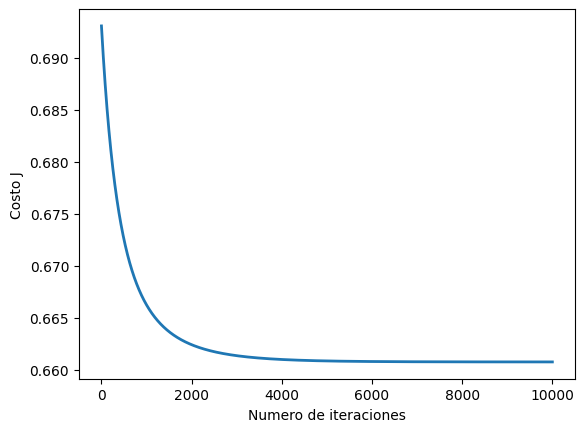

In [297]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.005
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X.shape[1])
#theta = np.zeros(X.shape[1])
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array = [1, 0.000e+00, 1.700e+02, 2.017e+03, 0.000e+00, 1.700e+01, 2.700e+01, 0.000e+00, 3.000e+00, 2.000e+00,
           0.000e+00, 0.000e+00, 0.000e+00, 4.300e+01, 6.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
           3.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 9.000e+00, 0.000e+00, 2.000e+00, 1.305e+02, 0.000e+00,
           0.000e+00, 1.000e+00, 7.900e+02]

aprueba = sigmoid(np.dot(X_array.T, theta))   # Se debe cambiar esto

print(f"Cliente reservo o no realizo la reserva correspondiente (usando el descenso por el gradiente):{aprueba}")

In [298]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.005
num_iters = 8000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(31)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array = [1, 0.000e+00, 8.200e+01, 2.015e+03, 5.000e+00, 2.900e+01, 1.600e+01, 0.000e+00, 3.000e+00, 2.000e+00,
           0.000e+00, 0.000e+00, 0.000e+00, 1.350e+02, 6.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
           0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 9.000e+00, 0.000e+00, 2.000e+00, 7.650e+01, 0.000e+00,
           0.000e+00, 0.000e+00, 1.360e+02]

aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print(f"Cliente reservo o no realizo la reserva correspondiente (usando el descenso por el gradiente):{aprueba}")

ValueError: shapes (100,24) and (31,) not aligned: 24 (dim 1) != 31 (dim 0)

In [299]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.005
num_iters = 8000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(31)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array = [1, 0.000e+00, 2.500e+01, 2.016e+03, 2.000e+00, 5.300e+01, 2.700e+01, 0.000e+00, 3.000e+00, 3.000e+00,
           0.000e+00, 0.000e+00, 0.000e+00, 2.500e+01, 5.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
           0.000e+00, 9.000e+00, 2.000e+00, 0.000e+00, 2.200e+02, 0.000e+00, 3.000e+00, 6.000e+01, 0.000e+00,
           1.000e+00, 1.000e+00, 6.690e+02]

aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print(f"Cliente reservo o no realizo la reserva correspondiente (usando el descenso por el gradiente):{aprueba}")

ValueError: shapes (100,24) and (31,) not aligned: 24 (dim 1) != 31 (dim 0)

In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.005
num_iters = 8000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(31)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array = [1, 0.000e+00, 1.000e+00, 2.016e+03, 7.000e+00, 1.100e+01, 9.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
           1.540e+02, 6.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 9.000e+00, 0.000e+00,
           3.000e+00, 9.500e+01, 0.000e+00, 0.000e+00, 1.000e+00, 3.740e+02]

aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print(f"Cliente reservo o no realizo la reserva correspondiente (usando el descenso por el gradiente):{aprueba}")